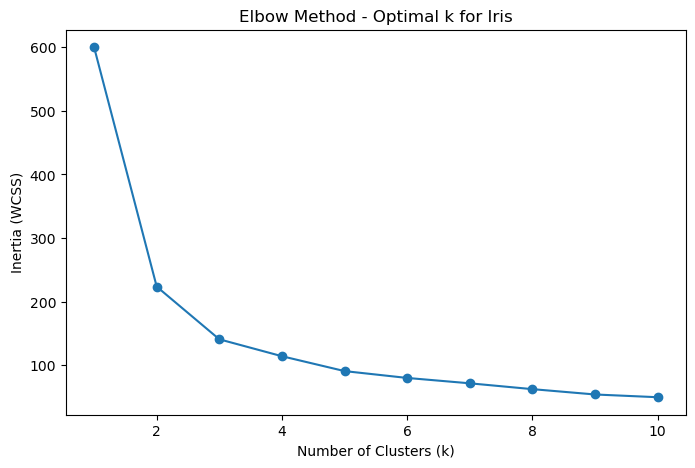

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster
0            5.1           3.5            1.4           0.2        1
1            4.9           3.0            1.4           0.2        1
2            4.7           3.2            1.3           0.2        1
3            4.6           3.1            1.5           0.2        1
4            5.0           3.6            1.4           0.2        1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Iris.csv")

if "Id" in data.columns:
    data = data.drop(columns=["Id"])
if "Species" in data.columns:
    data = data.drop(columns=["Species"])

X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)  # test cluster counts from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#  Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")  # Within-Cluster Sum of Squares
plt.title("Elbow Method - Optimal k for Iris")
plt.show()

#  Train KMeans with optimal clusters (let’s assume k=3 from elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

#  Add cluster labels to dataset
data["Cluster"] = y_kmeans

print(data.head())
